---
## **Creation High Dimensional Datasets for Train/Test the Time Series SVM Classifier**
---

<font size="2">Eudald Sangenis  

The objective of this file is to create the High Dimensional Dataset from the Test/Train Datasets used with the Time Series SVM classifier.

Parameters High Dimensional Dataset:  
- 6 signals from the IMU  
- variable window size  

Once this dataset is created the next step is to predict the labels and verify the navigation solution.</font>

---
## **<font size="5">1. Libraries</font>**
---

In [1]:
import os
import sys
import numpy as np
import pandas as pd  
from tqdm import tqdm                   
import matplotlib.pyplot as plt

# Get the current working directory
current_directory = os.getcwd()
# Get the parent directory (where the module is located)
parent_directory = os.path.dirname(current_directory)
# Append the parent directory to sys.path
sys.path.append(parent_directory)

# Import the module
import signal_processing_functions as sp

---
## **<font size="5">2. Empty variables:</font>**
---

In [2]:
x_100_df = pd.DataFrame(); x_200_df = pd.DataFrame(); x_300_df = pd.DataFrame()
x_400_df = pd.DataFrame(); x_500_df = pd.DataFrame(); x_600_df = pd.DataFrame()
x_700_df = pd.DataFrame(); x_800_df = pd.DataFrame(); x_900_df = pd.DataFrame()
x_1000_df = pd.DataFrame(); x_1100_df = pd.DataFrame(); x_1200_df = pd.DataFrame()
x_1300_df = pd.DataFrame(); x_1400_df = pd.DataFrame(); x_1500_df = pd.DataFrame()
x_1600_df = pd.DataFrame(); x_1700_df = pd.DataFrame(); x_1800_df = pd.DataFrame()

X_100_df = pd.DataFrame(); X_200_df = pd.DataFrame(); X_300_df = pd.DataFrame()
X_400_df = pd.DataFrame(); X_500_df = pd.DataFrame(); X_600_df = pd.DataFrame()
X_700_df = pd.DataFrame(); X_800_df = pd.DataFrame(); X_900_df = pd.DataFrame()
X_1000_df = pd.DataFrame(); X_1100_df = pd.DataFrame(); X_1200_df = pd.DataFrame()
X_1300_df = pd.DataFrame(); X_1400_df = pd.DataFrame(); X_1500_df = pd.DataFrame()
X_1600_df = pd.DataFrame(); X_1700_df = pd.DataFrame(); X_1800_df = pd.DataFrame()

---
## **<font size="5">3. Data Handling</font>**
---

In [3]:
window = 401            #51, 101, 201, 401 (number of window + label)
type_dataset = 'test'
data_dataset = '2022_08_01' # # 2022_03_17, 2022_07_27, 2022_08_01
num_signals = 6

# 2 signals
dataset_path_lab = parent_directory+'\\2_labeled_datasets\\'+data_dataset+'\\'
# 6 signals
dataset_path_unlab = parent_directory+'\\1_unlabeled_datasets\\'+data_dataset+'\\'
# save dataset path
dataset_save = current_directory+'\\HD_datasets\\'+data_dataset+'\\'
os.makedirs(dataset_save, exist_ok=True)

In [4]:
# Labeled datasets
dataset_filenames = ['x_100_df.csv',  'x_200_df.csv',  'x_300_df.csv',  'x_400_df.csv',  'x_500_df.csv',  'x_600_df.csv',
                     'x_700_df.csv',  'x_800_df.csv',  'x_900_df.csv',  'x_1000_df.csv', 'x_1100_df.csv', 'x_1200_df.csv',
                     'x_1300_df.csv', 'x_1400_df.csv', 'x_1500_df.csv', 'x_1600_df.csv', 'x_1700_df.csv', 'x_1800_df.csv']
datframes_names = [os.path.join(dataset_path_lab, filename) for filename in dataset_filenames]
x_df_lst = [pd.read_csv(name) for name in datframes_names]

# Unlabeled datasets
experiment_names = [('exp100_VN', 'walk 60 steps/s'), ('exp200_VN', 'walk 60 steps/s'),
                    ('exp300_VN', 'walk 90 steps/s'), ('exp400_VN', 'walk 90 steps/s'),
                    ('exp500_VN', 'jog 120 steps/s'), ('exp600_VN', 'jog 120 steps/s'),
                    ('exp700_VN', 'run 150 steps/s'), ('exp800_VN', 'run 150 steps/s'),
                    ('exp900_VN', 'sprint 180 steps/s'), ('exp1000_VN', 'sprint 180 steps/s'),
                    ('exp1100_VN', 'walk backward 60 steps/s'), ('exp1200_VN', 'walk backward 60 steps/s'),
                    ('exp1300_VN', 'jog backward 90 steps/s'),  ('exp1400_VN', 'jog backward 90 steps/s'),
                    ('exp1500_VN', 'side step right 90 steps/s'), ('exp1600_VN', 'side step right 90 steps/s'),
                    ('exp1700_VN', 'side step right 90 steps/s'), ('exp1800_VN', 'side step right 90 steps/s')]

data_folder = os.path.join(parent_directory, '1_unlabeled_datasets', data_dataset)
X_df_lst = [sp.mat2pandas(data_folder + os.sep, exp_name) for exp_name, _ in experiment_names]

In [5]:
for i in range(0,len(x_df_lst)):
    x = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800]
    exec(f'x_{x[i]}_df = x_df_lst[i]')

for i in range(0,len(X_df_lst)):
    x = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800]
    exec(f'X_{x[i]}_df = X_df_lst[i]')

print(x_100_df.shape, X_100_df.shape)

(53480, 5) (53529, 7)


In [6]:
c = ['timestamp','index']
X_100_df = X_100_df.drop(X_100_df.index[:49]).reset_index().drop(columns=c);    X_200_df = X_200_df.drop(X_200_df.index[:49]).reset_index().drop(columns=c)
X_300_df = X_300_df.drop(X_300_df.index[:49]).reset_index().drop(columns=c);    X_400_df = X_400_df.drop(X_400_df.index[:49]).reset_index().drop(columns=c)
X_500_df = X_500_df.drop(X_500_df.index[:49]).reset_index().drop(columns=c);    X_600_df = X_600_df.drop(X_600_df.index[:49]).reset_index().drop(columns=c)
X_700_df = X_700_df.drop(X_700_df.index[:49]).reset_index().drop(columns=c);    X_800_df = X_800_df.drop(X_800_df.index[:49]).reset_index().drop(columns=c)
X_900_df = X_900_df.drop(X_900_df.index[:49]).reset_index().drop(columns=c);    X_1000_df = X_1000_df.drop(X_1000_df.index[:49]).reset_index().drop(columns=c)
X_1100_df = X_1100_df.drop(X_1100_df.index[:49]).reset_index().drop(columns=c); X_1200_df = X_1200_df.drop(X_1200_df.index[:49]).reset_index().drop(columns=c)
X_1300_df = X_1300_df.drop(X_1300_df.index[:49]).reset_index().drop(columns=c); X_1400_df = X_1400_df.drop(X_1400_df.index[:49]).reset_index().drop(columns=c)
X_1500_df = X_1500_df.drop(X_1500_df.index[:49]).reset_index().drop(columns=c); X_1600_df = X_1600_df.drop(X_1600_df.index[:49]).reset_index().drop(columns=c)
X_1700_df = X_1700_df.drop(X_1700_df.index[:49]).reset_index().drop(columns=c); X_1800_df = X_1800_df.drop(X_1800_df.index[:49]).reset_index().drop(columns=c)

X_100_df['label'] = x_100_df['label'];   X_200_df['label'] = x_200_df['label']
X_300_df['label'] = x_300_df['label'];   X_400_df['label'] = x_400_df['label']
X_500_df['label'] = x_500_df['label'];   X_600_df['label'] = x_600_df['label']
X_700_df['label'] = x_700_df['label'];   X_800_df['label'] = x_800_df['label']
X_900_df['label'] = x_900_df['label'];   X_1000_df['label'] = x_1000_df['label']
X_1100_df['label'] = x_1100_df['label']; X_1200_df['label'] = x_1200_df['label']
X_1300_df['label'] = x_1300_df['label']; X_1400_df['label'] = x_1400_df['label']
X_1500_df['label'] = x_1500_df['label']; X_1600_df['label'] = x_1600_df['label']
X_1700_df['label'] = x_1700_df['label']; X_1800_df['label'] = x_1800_df['label']

del x_100_df,x_200_df,x_300_df,x_400_df,x_500_df,x_600_df,x_700_df,x_800_df,x_900_df,x_1000_df,x_1100_df,x_1200_df,x_1300_df,x_1400_df,x_1500_df,x_1600_df,x_1700_df,x_1800_df

In [7]:
if type_dataset == 'train':
    X = pd.concat([X_100_df, X_300_df, X_500_df, X_700_df, X_900_df,
                   X_1100_df, X_1300_df, X_1500_df, X_1700_df], ignore_index = True)

if type_dataset == 'test':
    X = pd.concat([X_200_df, X_400_df, X_600_df, X_800_df, X_1000_df,
                   X_1200_df, X_1400_df, X_1600_df, X_1800_df], ignore_index = True)

X = X.rename(columns={"acc1": "acc1_t", "acc2": "acc2_t", "acc3": "acc3_t", "gyro1": "gyro1_t", "gyro2": "gyro2_t", "gyro3": "gyro3_t"})

X

,acc1_t,acc2_t,acc3_t,gyro1_t,gyro2_t,gyro3_t,label
0,0.024983,-0.006249,-0.987329,-0.011539,0.002000,-0.011229,ZUPT
1,0.026351,-0.004096,-0.987442,-0.012501,0.003847,-0.010429,ZUPT
2,0.024423,-0.001987,-0.991508,-0.010466,0.004974,-0.011125,ZUPT
3,0.022808,-0.003290,-0.990991,-0.009614,0.003339,-0.011659,ZUPT
4,0.021317,-0.000933,-0.995246,-0.008998,0.004561,-0.011712,ZUPT
...,...,...,...,...,...,...,...
308949,0.007127,0.022026,-0.983154,-0.020418,0.006595,-0.015795,ZUPT
308950,0.007182,0.021964,-0.983094,-0.019863,0.007830,-0.016007,ZUPT
308951,0.010731,0.024156,-0.983907,-0.017660,0.008341,-0.014942,ZUPT
308952,0.012932,0.024731,-0.983640,-0.016607,0.007338,-0.014252,ZUPT


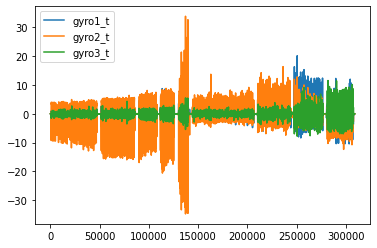

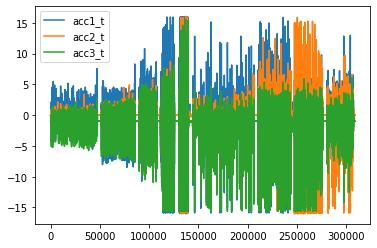

In [8]:
X.plot(y=['gyro1_t','gyro2_t','gyro3_t'], use_index=True)
X.plot(y=['acc1_t','acc2_t','acc3_t'], use_index=True)
plt.show()

del X_100_df,X_200_df,X_300_df,X_400_df,X_500_df,X_600_df,X_700_df,X_800_df,X_900_df,X_1000_df,X_1100_df,X_1200_df,X_1300_df,X_1400_df,X_1500_df,X_1600_df,X_1700_df,X_1800_df

Check if there are nan values:

In [9]:
X.isnull().values.any()

False

In [10]:
s = []
for i in range(window-1,-1,-1):
    s = np.concatenate((s, [f'acc1_t{i}', f'acc2_t{i}', f'acc3_t{i}', f'gyro1_t{i}', f'gyro2_t{i}', f'gyro3_t{i}']))
pd.DataFrame(s).T.to_csv(dataset_save+'HD_'+str(window-1)+'_'+str(num_signals)+'sig_'+type_dataset+'.csv', header=None, index=None, mode='a') 
print('Longitude header df',len(s))

Longitude header df 2406


In [11]:
d = []
for row in tqdm(range(len(X)-window+1)): # range(len(X)-window)
    for i in range(0,window):
        d = np.concatenate((d, X.iloc[row+i,:-1]))
    pd.DataFrame(d).T.to_csv(dataset_save+'HD_'+str(window-1)+'_'+str(num_signals)+'sig_'+type_dataset+'.csv', header=None, index=None, mode='a')    
    d = []

100%|██████████| 308554/308554 [2:44:51<00:00, 31.19it/s]  


In [12]:
t = pd.read_csv(dataset_save+'HD_'+str(window-1)+'_'+str(num_signals)+'sig_'+type_dataset+'.csv')
t

,acc1_t400,acc2_t400,acc3_t400,gyro1_t400,gyro2_t400,gyro3_t400,acc1_t399,acc2_t399,acc3_t399,gyro1_t399,...,acc3_t1,gyro1_t1,gyro2_t1,gyro3_t1,acc1_t0,acc2_t0,acc3_t0,gyro1_t0,gyro2_t0,gyro3_t0
0,0.024983,-0.006249,-0.987329,-0.011539,0.002000,-0.011229,0.026351,-0.004096,-0.987442,-0.012501,...,-0.979135,-0.017425,-0.051559,-0.022543,0.024983,-0.003676,-0.980239,-0.018434,-0.051307,-0.019825
1,0.026351,-0.004096,-0.987442,-0.012501,0.003847,-0.010429,0.024423,-0.001987,-0.991508,-0.010466,...,-0.980239,-0.018434,-0.051307,-0.019825,0.031693,0.000449,-0.984306,-0.019515,-0.054257,-0.019799
2,0.024423,-0.001987,-0.991508,-0.010466,0.004974,-0.011125,0.022808,-0.003290,-0.990991,-0.009614,...,-0.984306,-0.019515,-0.054257,-0.019799,0.031701,-0.000392,-0.978623,-0.020507,-0.056558,-0.021849
3,0.022808,-0.003290,-0.990991,-0.009614,0.003339,-0.011659,0.021317,-0.000933,-0.995246,-0.008998,...,-0.978623,-0.020507,-0.056558,-0.021849,0.027313,-0.000616,-0.981299,-0.018714,-0.053525,-0.022057
4,0.021317,-0.000933,-0.995246,-0.008998,0.004561,-0.011712,0.019285,0.000944,-0.988779,-0.009491,...,-0.981299,-0.018714,-0.053525,-0.022057,0.027663,-0.004549,-0.989081,-0.022028,-0.052175,-0.021570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308549,0.019386,0.005974,-0.978879,-0.011523,-0.014550,-0.018996,0.016025,0.004658,-0.977200,-0.013718,...,-0.987550,-0.021918,0.005140,-0.016632,0.007127,0.022026,-0.983154,-0.020418,0.006595,-0.015795
308550,0.016025,0.004658,-0.977200,-0.013718,-0.015254,-0.018992,0.018747,0.003926,-0.980168,-0.015657,...,-0.983154,-0.020418,0.006595,-0.015795,0.007182,0.021964,-0.983094,-0.019863,0.007830,-0.016007
308551,0.018747,0.003926,-0.980168,-0.015657,-0.014844,-0.019252,0.021279,0.002605,-0.980879,-0.015706,...,-0.983094,-0.019863,0.007830,-0.016007,0.010731,0.024156,-0.983907,-0.017660,0.008341,-0.014942
308552,0.021279,0.002605,-0.980879,-0.015706,-0.015002,-0.019305,0.017952,0.002920,-0.977889,-0.014443,...,-0.983907,-0.017660,0.008341,-0.014942,0.012932,0.024731,-0.983640,-0.016607,0.007338,-0.014252


<AxesSubplot:>

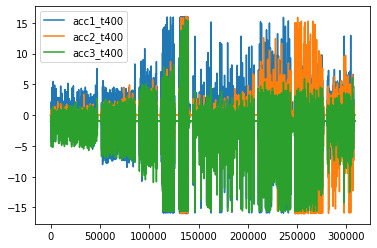

In [13]:
t.iloc[:,0:3].plot()